# Marketing Analysis

The purpuse of this notebook is to give some insights and understanding to the IBM dataset: https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/.

In this repository you will find the dataset as an .xlsx file. There, the data is in a single column as csv, so you may need to change the data from excel as follows: Open the TESTING DB, then select the column with the data, go give click on data in excel, next click on text in columns and finally limit data by comma. Once you have made it, you are ready to start.

In [49]:
# Through this notebook we're gonna need the following python libraries
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import warnings                                            
warnings.filterwarnings('ignore')

In [88]:
# Lets read the file
print('Write the local path of the file')
path = input() 
df = pd.read_excel(path)

Write the local path of the file
/Users/David/Desktop/Projects/Marketing/TESTING_BD.xlsx


## Analysis of the data

In [3]:
# Lets give a quick view of the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Since here we have depicted the categorical and numerical variables, also there are no nulls in the df. Finally, there are 9134 records with 34 columns each.

The categorical column Response, contains the info about which customers were engaged with the marketing strategy. In the next code we are going to analyze this variable confronted with the other ones.

## Engaged people

First lets check the total number people who have responded to the strategy

In [7]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In percentages it would look as follows

In [8]:
df.groupby('Response').count()['Customer']/df.shape[0]*100

Response
No     85.679877
Yes    14.320123
Name: Customer, dtype: float64

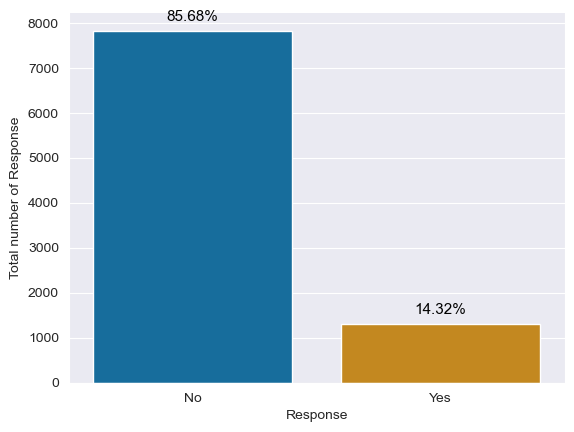

In [9]:
ax = sns.countplot(data = df, x = 'Response', palette='colorblind')
plt.ylabel('Total number of Response')
ax.spines['top'].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
    textcoords='offset points') 
plt.show()

As we see, there are only 14% of the people engaged with the marketing strategy

## Engagement per renewal offer type

Lets see how data is distributed across responses by the type of offert

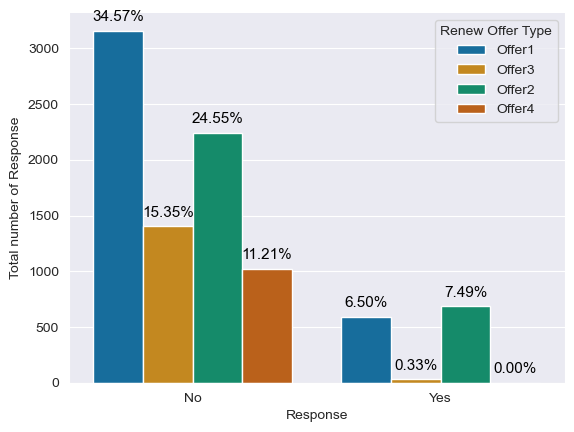

In [10]:
ax = sns.countplot(data = df, x = 'Response', hue = 'Renew Offer Type' ,palette='colorblind')
plt.ylabel('Total number of Response')
ax.spines['top'].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
    textcoords='offset points') 
plt.show()

Now lest focus is such customers who have give a positive response to  the marketing campaign

In [11]:
df_engaged = df[df['Response'] == 'Yes']
df_engaged.shape

(1308, 24)

In [12]:
df_engaged.groupby('Renew Offer Type').count()['Customer']

Renew Offer Type
Offer1    594
Offer2    684
Offer3     30
Name: Customer, dtype: int64

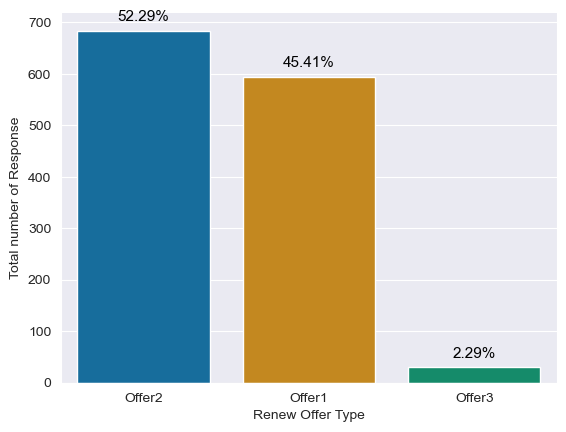

In [13]:
ax = sns.countplot(data = df_engaged, x = 'Renew Offer Type' ,palette='colorblind')
plt.ylabel('Total number of Response')
ax.spines['top'].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height() * 100 / df_engaged.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
    textcoords='offset points') 
plt.show()

Finally let's give a look to the engagement per renewal offer, i.e. the rate that a offer was taken

In [14]:
count_engaged_offer = (df.groupby([
 'Renew Offer Type','Response'
]).count()['Customer']).unstack().fillna(0)
count_engaged_offer

Response,No,Yes
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


In [15]:
rates_engaged_offert = (df.groupby([
 'Renew Offer Type','Response'
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']*100).unstack().fillna(0)
rates_engaged_offert

Response,No,Yes
Renew Offer Type,,
Offer1,84.168443,15.831557
Offer2,76.623377,23.376623
Offer3,97.905028,2.094972
Offer4,100.000000,0.000000


As we see, the sum by columns is 100, which was expected. Lest consider only the positive responses

In [16]:
count_engaged_offert_pos = count_engaged_offer['Yes']
count_engaged_offert_pos

Renew Offer Type
Offer1    594.0
Offer2    684.0
Offer3     30.0
Offer4      0.0
Name: Yes, dtype: float64

In [17]:
rates_engaged_offert_pos = rates_engaged_offert['Yes']
rates_engaged_offert_pos

Renew Offer Type
Offer1    15.831557
Offer2    23.376623
Offer3     2.094972
Offer4     0.000000
Name: Yes, dtype: float64

Lets graph this

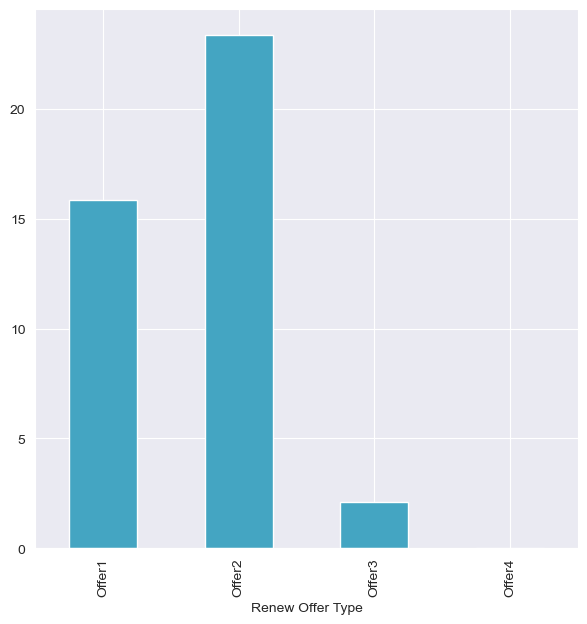

In [18]:
rates_engaged_offert_pos.plot(
 kind='bar',
 figsize=(7, 7),
 color = "#44a5c2",
 #color='steelblue',
 grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Note that the first grahp means that 7.49% of the total population said positive answer to offert 2. The second one in this section takes into account the positive responses as a whole, so that 52.29% of people who have positive response were attracted by offert 2. Otherwise, the last barplot tell us that upon all the times that offer 2 was presented, 23% of the times it give a positive response. To sum up, the offer2 is working best for the customers.

## Engagement by renewal offer type and vehicle

In the last section we analyze how responses work by looking at the type of offer, in this section it is ideal to delve into the renewal offer type, for this purpose we add a new variable for analysis, the Vehicle Class.

First, we split the data in such a way that each offer is break into vehicle class and response

In [19]:
offer_vehicle_count = (df.groupby([
 'Renew Offer Type', 'Vehicle Class' ,'Response'
]).count()['Customer']).unstack().fillna(0).unstack().fillna(0)

offer_vehicle_count

Response                    No                                          \
Vehicle Class    Four-Door Car Luxury Car Luxury SUV    SUV Sports Car   
Renew Offer Type                                                         
Offer1                  1533.0       62.0       71.0  724.0      185.0   
Offer2                  1197.0       35.0       35.0  360.0      106.0   
Offer3                   721.0       31.0       27.0  276.0       68.0   
Offer4                   546.0       23.0       21.0  148.0       35.0   

Response                                Yes                               \
Vehicle Class    Two-Door Car Four-Door Car Luxury Car Luxury SUV    SUV   
Renew Offer Type                                                           
Offer1                  583.0         264.0        6.0       18.0  168.0   
Offer2                  509.0         336.0        6.0       12.0  120.0   
Offer3                  279.0          24.0        0.0        0.0    0.0   
Offer4                  251.0           0.0        0.0        0.0    0.0   

Response                                  
Vehicle Class    Sports Car Two-Door Car  
Renew Offer Type                          
Offer1                 42.0         96.0  
Offer2                 48.0        162.0  
Offer3                  0.0          6.0  
Offer4                  0.0          0.0

Notice that we have unstacked the df twice to have the last table, next we calculate the engagement of this table just by dividing each row by the count per renew offer type -each category of this variable works as a probabilistic space in this case-

In [20]:
offer_vehicle_rate = (df.groupby([
 'Renew Offer Type', 'Vehicle Class' ,'Response'
]).count()['Customer']/ df.groupby(['Renew Offer Type']).count()['Customer']*100).unstack().fillna(0).unstack().fillna(0)

offer_vehicle_rate

Response                    No                                              \
Vehicle Class    Four-Door Car Luxury Car Luxury SUV        SUV Sports Car   
Renew Offer Type                                                             
Offer1               40.858209   1.652452   1.892324  19.296375   4.930704   
Offer2               40.909091   1.196172   1.196172  12.303486   3.622693   
Offer3               50.349162   2.164804   1.885475  19.273743   4.748603   
Offer4               53.320312   2.246094   2.050781  14.453125   3.417969   

Response                                Yes                                  \
Vehicle Class    Two-Door Car Four-Door Car Luxury Car Luxury SUV       SUV   
Renew Offer Type                                                              
Offer1              15.538380      7.036247   0.159915   0.479744  4.477612   
Offer2              17.395762     11.483254   0.205058   0.410116  4.101162   
Offer3              19.483240      1.675978   0.000000   0.000000  0.000000   
Offer4              24.511719      0.000000   0.000000   0.000000  0.000000   

Response                                  
Vehicle Class    Sports Car Two-Door Car  
Renew Offer Type                          
Offer1             1.119403     2.558635  
Offer2             1.640465     5.536569  
Offer3             0.000000     0.418994  
Offer4             0.000000     0.000000

In [21]:
# Checking if the calculations are right
offer_vehicle_rate.sum(axis=1)

Renew Offer Type
Offer1    100.0
Offer2    100.0
Offer3    100.0
Offer4    100.0
dtype: float64

Considering positive responses only

In [22]:
offer_vehicle_rate_pos = offer_vehicle_rate['Yes']
offer_vehicle_rate_pos

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,7.036247,0.159915,0.479744,4.477612,1.119403,2.558635
Offer2,11.483254,0.205058,0.410116,4.101162,1.640465,5.536569
Offer3,1.675978,0.000000,0.000000,0.000000,0.000000,0.418994
Offer4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


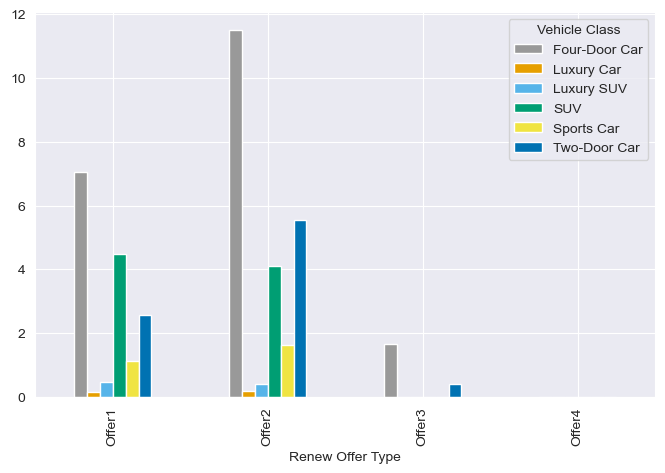

In [23]:
offer_vehicle_rate_pos.plot(
 kind='bar',
 figsize=(8, 5),
 color = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"],
 #color='steelblue',
 grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Some important things to stand out from the last barplot. First, we know that is more likely to accept the offert 2 amog the total of offers but here the engament is split by the type of vehicle, this help us to see that the engagement is higher among customers with Four-Door and Two-Door vehicles. The engament in Four-Door, Two-Door and sport vehicles seem to be higher with the offer 2 while SUV cars with offer 1. To be certain about this, we calculate the engament by offer given a vehicle -conditional probabilitie- just as simple as follows

In [24]:
conditional_offer_vehicle_engagament = (df.groupby([
 'Vehicle Class', 'Renew Offer Type', 'Response'
]).count()['Customer']/ df.groupby(['Vehicle Class']).count()['Customer']*100).unstack().fillna(0).unstack().fillna(0)

conditional_offer_vehicle_engagament

Response                 No                                        Yes  \
Renew Offer Type     Offer1     Offer2     Offer3     Offer4    Offer1   
Vehicle Class                                                            
Four-Door Car     33.174638  25.903484  15.602683  11.815624  5.713049   
Luxury Car        38.036810  21.472393  19.018405  14.110429  3.680982   
Luxury SUV        38.586957  19.021739  14.673913  11.413043  9.782609   
SUV               40.311804  20.044543  15.367483   8.240535  9.354120   
Sports Car        38.223140  21.900826  14.049587   7.231405  8.677686   
Two-Door Car      30.911983  26.988335  14.793213  13.308590  5.090138   

Response                                     
Renew Offer Type    Offer2    Offer3 Offer4  
Vehicle Class                                
Four-Door Car     7.271153  0.519368    0.0  
Luxury Car        3.680982  0.000000    0.0  
Luxury SUV        6.521739  0.000000    0.0  
SUV               6.681514  0.000000    0.0  
Sports Car        9.917355  0.000000    0.0  
Two-Door Car      8.589608  0.318134    0.0

Getting only the positive responses

In [25]:
conditional_offer_vehicle_engagament_positve = conditional_offer_vehicle_engagament['Yes']

conditional_offer_vehicle_engagament_positve

Renew Offer Type,Offer1,Offer2,Offer3,Offer4
Vehicle Class,,,,
Four-Door Car,5.713049,7.271153,0.519368,0.0
Luxury Car,3.680982,3.680982,0.000000,0.0
Luxury SUV,9.782609,6.521739,0.000000,0.0
SUV,9.354120,6.681514,0.000000,0.0
Sports Car,8.677686,9.917355,0.000000,0.0
Two-Door Car,5.090138,8.589608,0.318134,0.0


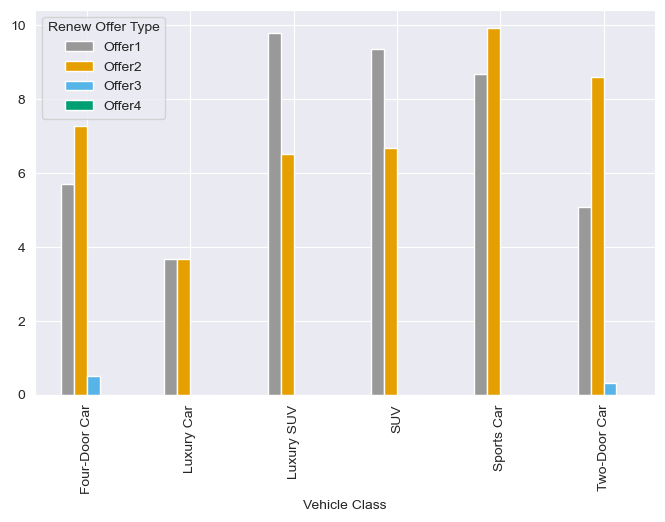

In [26]:
conditional_offer_vehicle_engagament_positve.plot(
 kind='bar',
 figsize=(8, 5),
 color = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"],
 #color='steelblue',
 grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

This plot give us insights of what offer could be more attractive to customers based on their type of vehicle.

## Engagement per sales channel

Lets see how data is distributed across responses by the type of channel

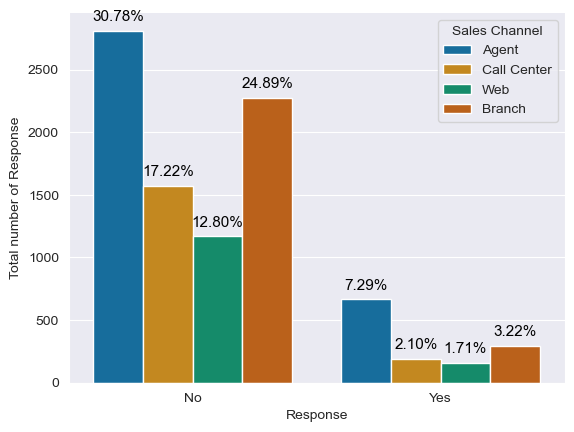

In [27]:
ax = sns.countplot(data = df, x = 'Response', hue = 'Sales Channel' ,palette='colorblind')
plt.ylabel('Total number of Response')
ax.spines['top'].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
    textcoords='offset points') 
plt.show()

Now lest focus is such customers who have give a positive response to  the marketing campaign

In [28]:
df_engaged.groupby('Sales Channel').count()['Customer']

Sales Channel
Agent          666
Branch         294
Call Center    192
Web            156
Name: Customer, dtype: int64

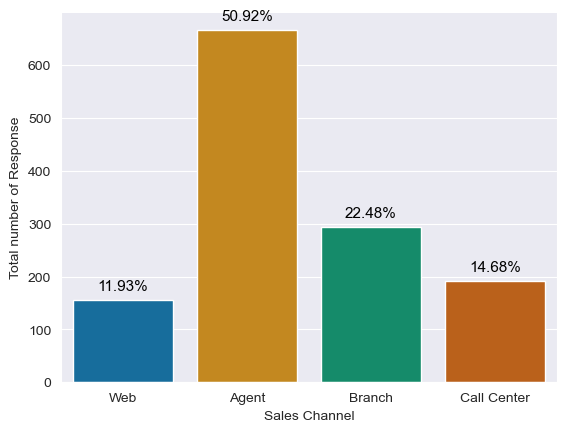

In [29]:
ax = sns.countplot(data = df_engaged, x = 'Sales Channel' ,palette='colorblind')
plt.ylabel('Total number of Response')
ax.spines['top'].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height() * 100 / df_engaged.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
    textcoords='offset points') 
plt.show()

Finally let's give a look to the engagement per sales channel, i.e. the rate that channel takes

In [30]:
count_engaged_channel = (df.groupby([
 'Sales Channel','Response'
]).count()['Customer']).unstack().fillna(0)
count_engaged_channel

Response,No,Yes
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [31]:
rates_engaged_channel = (df.groupby([
 'Sales Channel','Response'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']*100).unstack().fillna(0)

rates_engaged_channel

Response,No,Yes
Sales Channel,,
Agent,80.845557,19.154443
Branch,88.546942,11.453058
Call Center,89.121813,10.878187
Web,88.226415,11.773585


As we see, the sum by columns is 100, which was expected. Lest consider only the positive responses

In [32]:
rates_engaged_channel_pos = rates_engaged_channel['Yes']
rates_engaged_channel_pos

Sales Channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
Name: Yes, dtype: float64

Lest graph this

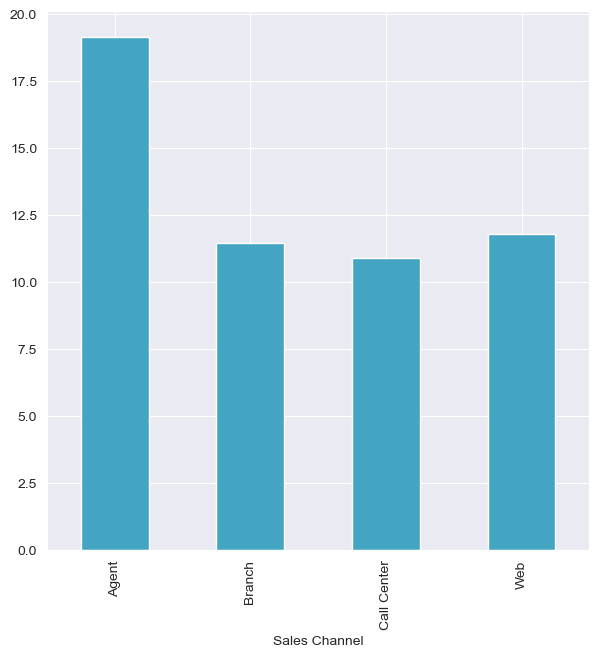

In [33]:
rates_engaged_channel_pos.plot(
 kind='bar',
 figsize=(7, 7),
 color = "#44a5c2",
 #color='steelblue',
 grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Note that the first graph means that 7.29% of the total population said given a yes being contacted via agent. The second one in this section takes into account the positive responses as a whole, so that 52.92% of people who have positive responses were attracted by an agent. Lastly, the final barplot tells us that upon all the times that an agent tried to reach a customer out, 19% of the times it gave a positive response. To sum up, the Agent channel is working best for the customers.

## Engagement by sales channel and size vehicle

In the last section we analyze how responses work by looking at the channel, in this section it is ideal to delve into the sales channel, for this purpose we add a new variable for analysis, the Vehicle Size.

First, we split the data in such a way that each channel is break into vehicle size and response

In [34]:
channel_size_count = (df.groupby([
 'Sales Channel', 'Vehicle Size' ,'Response'
]).count()['Customer']).unstack().fillna(0).unstack().fillna(0)

channel_size_count

Response         No                 Yes              
Vehicle Size  Large Medsize Small Large Medsize Small
Sales Channel                                        
Agent           269    1967   575    72     504    90
Branch          237    1588   448    54     192    48
Call Center     161    1098   314    24     120    48
Web             111     829   229    18     126    12

Notice that we have unstacked the df twice to have the last table, next we calculate the engagement of this table just by dividing each row by the count per sales channel type -each category of this variable works as a probabilistic space in this case-

In [35]:
channel_size_rate = (df.groupby([
 'Sales Channel', 'Vehicle Size' ,'Response'
]).count()['Customer']/ df.groupby(['Sales Channel']).count()['Customer']*100).unstack().fillna(0).unstack().fillna(0)

channel_size_rate

Response             No                             Yes                     
Vehicle Size      Large    Medsize      Small     Large    Medsize     Small
Sales Channel                                                               
Agent          7.736555  56.571757  16.537245  2.070751  14.495255  2.588438
Branch         9.232567  61.862096  17.452279  2.103623   7.479548  1.869887
Call Center    9.121813  62.209632  17.790368  1.359773   6.798867  2.719547
Web            8.377358  62.566038  17.283019  1.358491   9.509434  0.905660

In [36]:
# Checking if the calculations are right
channel_size_rate.sum(axis=1)

Sales Channel
Agent          100.0
Branch         100.0
Call Center    100.0
Web            100.0
dtype: float64

In [37]:
channel_size_rate_pos = channel_size_rate['Yes']
channel_size_rate_pos

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,2.070751,14.495255,2.588438
Branch,2.103623,7.479548,1.869887
Call Center,1.359773,6.798867,2.719547
Web,1.358491,9.509434,0.905660


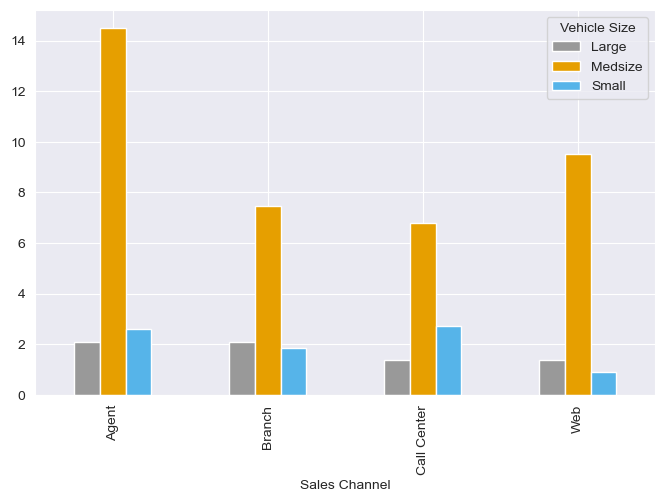

In [38]:
channel_size_rate_pos.plot(
 kind='bar',
 figsize=(8, 5),
 color = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"],
 #color='steelblue',
 grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Some important things to stand out from the last barplot. The Midsize vehicle has better engagement response in all sales channels. The small vehicles could be reached via call center and agent instead of via web or branch.

## Engagement by months since policy inception

First, lest check the column



In [39]:
np.sort(df['Months Since Policy Inception'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

As we have been doing, lets calculate the engagement by Months Since Policy Inception

In [40]:
count_engaged_since_policy = (df.groupby([
 'Months Since Policy Inception','Response'
]).count()['Customer']).unstack().fillna(0)
count_engaged_since_policy.head()

Response,No,Yes
Months Since Policy Inception,,
0,71.0,12.0
1,73.0,12.0
2,71.0,18.0
3,84.0,30.0
4,73.0,18.0


In [41]:
rates_engaged_since_policy = (df.groupby([
 'Months Since Policy Inception','Response'
]).count()['Customer'] / df.groupby('Months Since Policy Inception').count()['Customer']*100).unstack().fillna(0)

rates_engaged_since_policy.head()

Response,No,Yes
Months Since Policy Inception,,
0,85.542169,14.457831
1,85.882353,14.117647
2,79.775281,20.224719
3,73.684211,26.315789
4,80.219780,19.780220


In [42]:
rates_engaged_since_policy_pos = rates_engaged_since_policy['Yes']
rates_engaged_since_policy_pos.head()

Months Since Policy Inception
0    14.457831
1    14.117647
2    20.224719
3    26.315789
4    19.780220
Name: Yes, dtype: float64

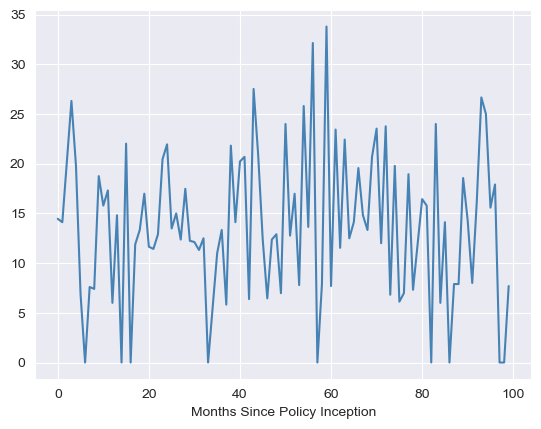

In [43]:
x = rates_engaged_since_policy_pos.index
y = rates_engaged_since_policy_pos.values
sns.lineplot(x = x, y = y, data = rates_engaged_since_policy_pos, color='steelblue')
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Also lets give a look to the statistics for this variable

In [52]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

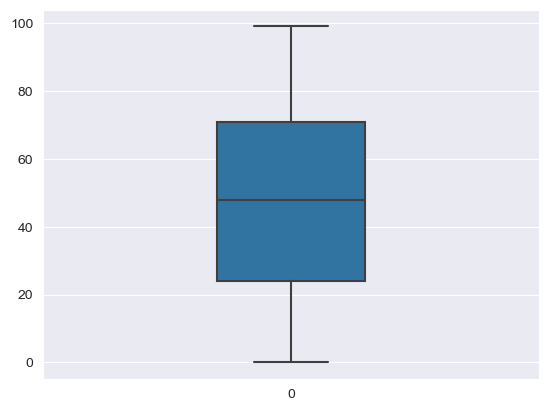

In [57]:
sns.boxplot(df['Months Since Policy Inception'], width=0.3)
figzise = (2,2)
plt.show()

## Customer segmentation by CLV and months since policy inception

Now we want to give an analysis by clv and months since policy inception. We have already given a look to the variable months since policy inception. To facilitate the work it is adequate to segment the data. Inasmuch as the last section, lets segmentate months since policy inception by the mean

In [61]:
df['Segment Months Since Policy'] = df['Months Since Policy Inception'].apply(lambda x: 'under' if x < df['Months Since Policy Inception'].mean() else 'over' )
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Segment Months Since Policy
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,under
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,under
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,under
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,over
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,under


Now its time to the clv to be taken into account

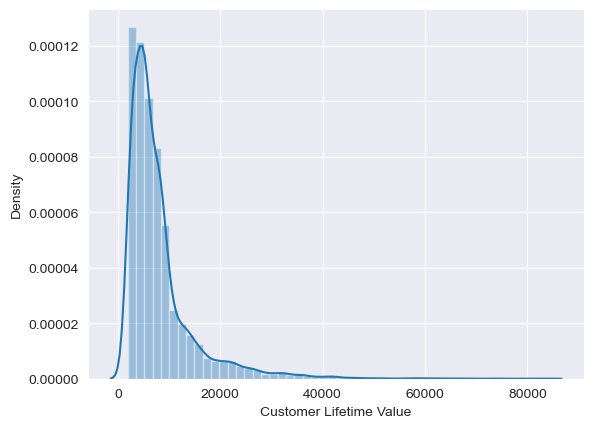

In [51]:
sns.distplot(df['Customer Lifetime Value'])
plt.show()

In [62]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

This variable depicts an exponential distribution with  mean 8000 and standard distribution 6870. To segmentize this variable, lest pick where the 50% of the probability is accumulated, i.e. the median

In [63]:
df['Segment clv'] = df['Customer Lifetime Value'].apply(lambda x: 'under' if x < df['Customer Lifetime Value'].median() else 'over' )
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Segment Months Since Policy,Segment clv
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,under,under
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,under,over
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,under,over
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,over,over
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,under,under


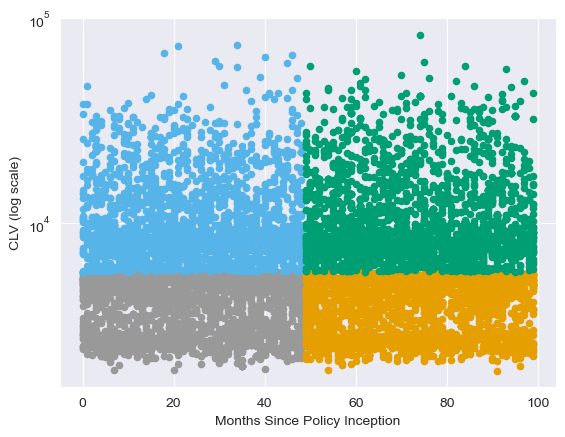

In [84]:
#color = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
ax = df[(df['Segment clv']=='under') & (df['Segment Months Since Policy']=='under')].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color ="#999999")

df[(df['Segment clv']=='under') & (df['Segment Months Since Policy']=='over')].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color ="#E69F00",ax=ax)

df[(df['Segment clv']=='over') & (df['Segment Months Since Policy']=='under')].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color ="#56B4E9",ax=ax)

df[(df['Segment clv']=='over') & (df['Segment Months Since Policy']=='over')].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color ="#009E73",ax=ax,grid=True)

ax.set_ylabel('CLV (log scale)')

plt.show()

Finally, lets calculate the engagement rate by considering this two segmetations

In [91]:
clv_police_rate = (df.groupby([
 'Segment clv', 'Segment Months Since Policy' ,'Response'
]).count()['Customer']/ df.groupby(['Segment clv', 'Segment Months Since Policy']).count()['Customer']*100).unstack().fillna(0)

clv_police_rate

Response                                        No        Yes
Segment clv Segment Months Since Policy                      
over        over                         86.127168  13.872832
            under                        86.569092  13.430908
under       over                         83.754993  16.245007
            under                        86.227804  13.772196

In [93]:
# Taking the positive responses
clv_police_rate_responses = clv_police_rate['Yes']
clv_police_rate_responses = clv_police_rate_responses.unstack().fillna(0)
clv_police_rate_responses

Segment Months Since Policy,over,under
Segment clv,,
over,13.872832,13.430908
under,16.245007,13.772196


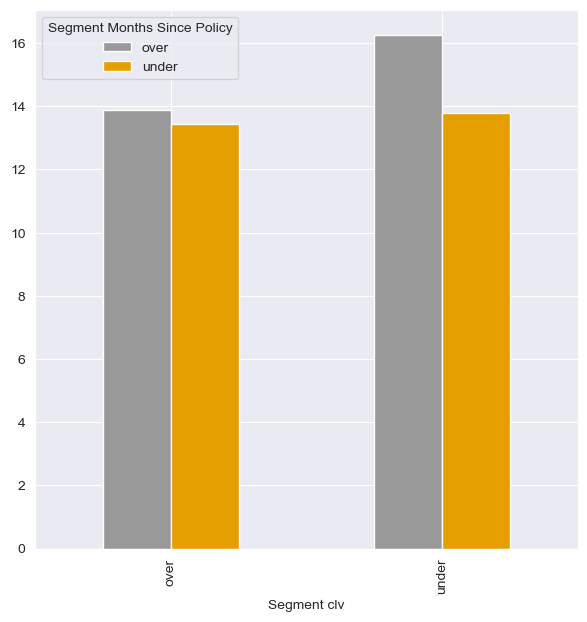

In [95]:
clv_police_rate_responses.plot(
 kind='bar',
 figsize=(7, 7),
 color = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"],
 #color='steelblue',
 grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

The last graphic tell us that the engagement is higher in customers who have been insuranced more time over the mean and this perform even better if their clv is under the median